In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import filters
# import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Grayscale image

Read digit image using `plt.imread`

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

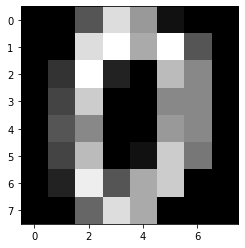

In [24]:
# load grayscale digits images
digits = datasets.load_digits()
img = digits.images[0]

# plot image
plt.imshow(img, cmap='gray')

Print the image data and the size of the image

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Size of the image: (8, 8)


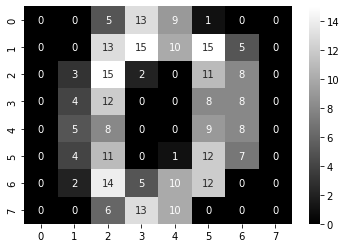

In [26]:
# print image as a matrix
print(img)

# visualize the matrix
sns.heatmap(img, annot=True, cmap='gray')

# print image size
print("Size of the image:", img.shape)

# Colored image

Read a colored image using `plt.imread`

Size of the image: (512, 512, 3)


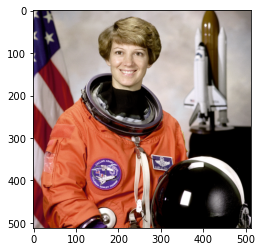

In [27]:
# read colored image
img = plt.imread('data/astronaut.png')
plt.imshow(img)

# print image size
print("Size of the image:", img.shape)

Visualize each r, g, b channels separately

Text(0.5, 1.0, 'combined')

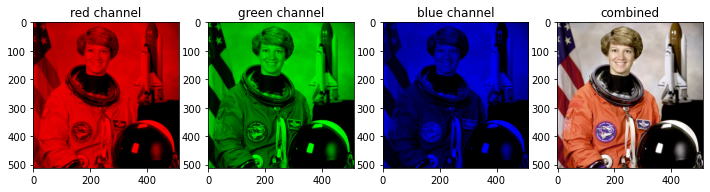

In [28]:
plt.figure(figsize=(12, 12))
# red
plt.subplot(1, 4, 1)
red = plt.imread('data/astronaut.png')
red[:, :, [1, 2]] = 0
plt.imshow(red)
plt.title('red channel')
# green
plt.subplot(1, 4, 2)
green = plt.imread('data/astronaut.png')
green[:, :, [0, 2]] = 0
plt.imshow(green)
plt.title('green channel')
# blue
plt.subplot(1, 4, 3)
blue = plt.imread('data/astronaut.png')
blue[:, :, [0, 1]] = 0
plt.imshow(blue)
plt.title('blue channel')
# original
plt.subplot(1, 4, 4)
plt.imshow(img)
plt.title('combined')

# Image processing basics

## Histogram

Load moon image. Plot histogram using `plt.hist`. Then, perform contrast enhancement using histogram equalization and plot histogram.

In [10]:
from skimage import data

Text(0, 0.5, 'Frequency of each intensity value')

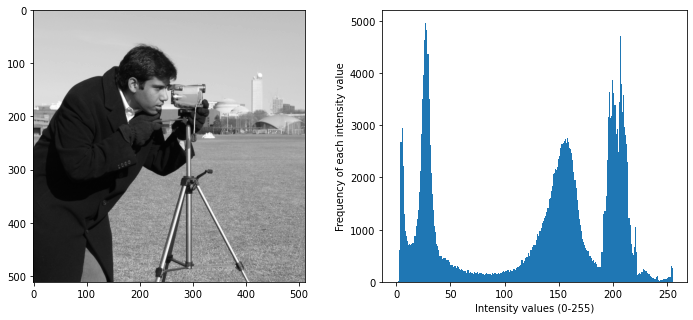

In [13]:
# load moon image
img = data.camera()

plt.figure(figsize=(12, 5))
# plot image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

# plot histogram
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.xlabel('Intensity values (0-255)')
plt.ylabel('Frequency of each intensity value')

In [14]:
from skimage import exposure

Text(0, 0.5, 'Frequency of each intensity value')

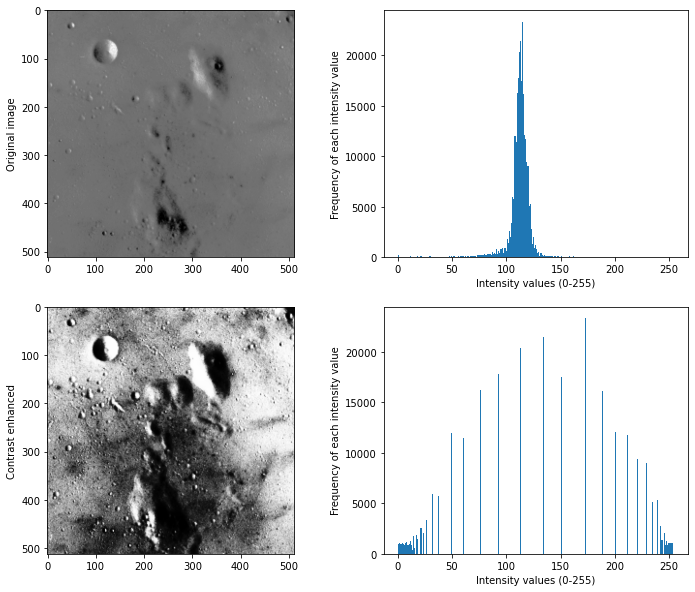

In [15]:
# Moon surface example
img = data.moon()

plt.figure(figsize=(12, 10))
# plot image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.ylabel('Original image')

# plot histogram
plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(img.ravel(), bins=256, range=(0, 255))
plt.xlabel('Intensity values (0-255)')
plt.ylabel('Frequency of each intensity value')

# equalization
img_eq = (exposure.equalize_hist(img) * 255).astype('uint8')

# plot image
plt.subplot(2, 2, 3)
plt.imshow(img_eq, cmap='gray')
plt.ylabel('Contrast enhanced')

# plot histogram
plt.subplot(2, 2, 4)
n, bins, patches = plt.hist(img_eq.ravel(), bins=256, range=(0, 255))
plt.xlabel('Intensity values (0-255)')
plt.ylabel('Frequency of each intensity value')

## Thresholding

Load cameraman example. Plot the histogram and pick a threshold to segment human from background.

In [16]:
from skimage import data

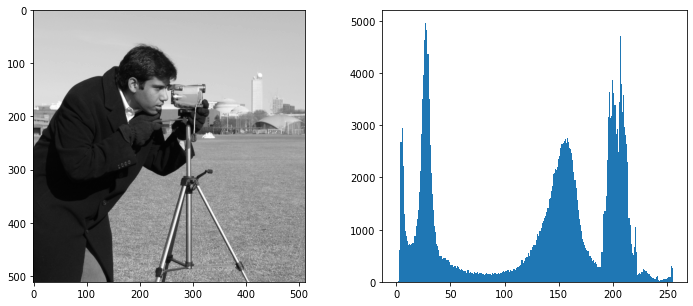

In [17]:
# load cameraman image
img = data.camera()

plt.figure(figsize=(12, 5))
# plot image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

# plot histogram
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(img.ravel(), bins=256)

Choose threshold=75. Perform thresholding and visualize the result.

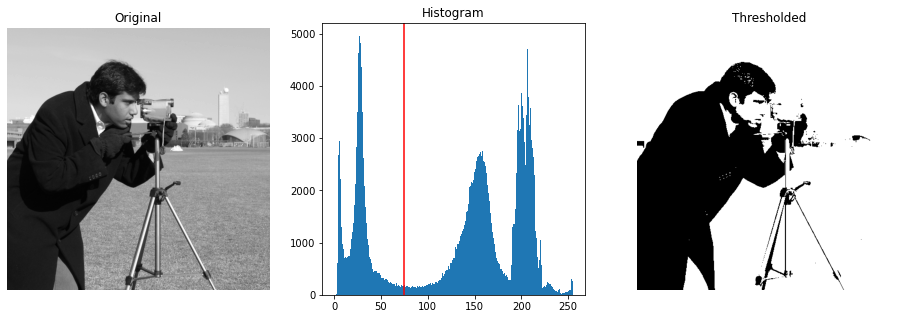

In [18]:
# choose 75 as threshold
thresh = 75
binary = img > thresh

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.hist(img.ravel(), bins=256)
plt.title('Histogram')
plt.axvline(thresh, color='r')

plt.subplot(1, 3, 3)
plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Thresholded')
plt.axis('off')

plt.show()

## Image rotation using geometric transformation

Load cameraman example. Get 90 degree rotation matrix using OpenCV function `cv2.getRotationMatrix2D`. Print and observe the rotation matrix. Apply the matrix to the image using `cv2.warpAffine` and visualize the result.

In [19]:
from skimage import transform

In [20]:
# rotation matrix of a 45 degree rotation
matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                   [np.sin(np.pi/4), np.cos(np.pi/4), 0],
                   [0, 0, 1]])
print(matrix)
tform = transform.EuclideanTransform(matrix)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


(-0.5, 511.5, 511.5, -0.5)

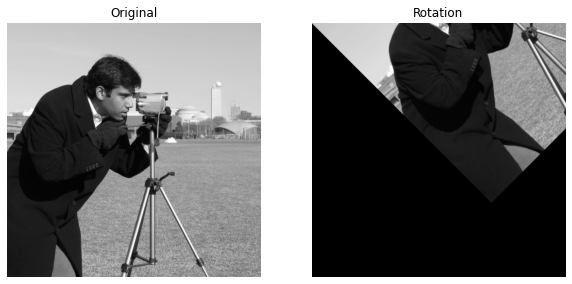

In [21]:
angle = 90

# load cameraman image
img = data.camera()

# apply the rotation matrix
rotated = transform.warp(img, tform)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated, cmap=plt.cm.gray)
plt.title('Rotation')
plt.axis('off')


# Image convolution with kernel

Load cameraman example (Thank you cameraman!!). 

(-0.5, 511.5, 511.5, -0.5)

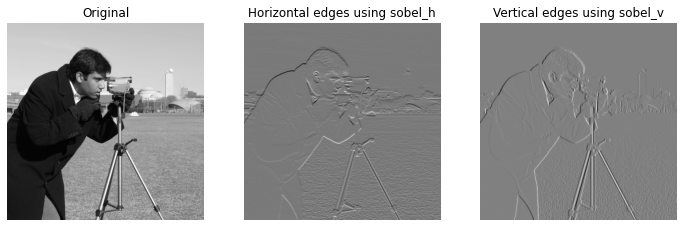

In [8]:
# load cameraman image
img = data.camera()

# apply sobel horizontal kernel
img_edge_h = filters.sobel_h(img)

# apply sobel vertical kernel
img_edge_v = filters.sobel_v(img)

# visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_edge_h, cmap=plt.cm.gray)
plt.title('Horizontal edges using sobel_h')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_edge_v, cmap=plt.cm.gray)
plt.title('Vertical edges using sobel_v')
plt.axis('off')



# Covolutional neural networks (CNN)

Explore the PyTorch official tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html